# import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import imblearn

# read data

In [3]:
raw_data=pd.read_csv(r'E:\zeyad\eitslat\full_gen_data.csv')

In [4]:
raw_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [5]:
raw_data.shape

(100000, 24)

# checking for missing values

In [6]:
raw_data.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

# checking for duplicates

In [7]:
raw_data.duplicated().sum()

0

# understanding the data

In [8]:
raw_data.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [9]:
raw_data.dtypes

country            object
article            object
sales               int64
regular_price     float64
current_price     float64
ratio             float64
retailweek         object
promo1              int64
promo2              int64
customer_id       float64
article.1          object
productgroup       object
category           object
cost              float64
style              object
sizes              object
gender             object
rgb_r_main_col      int64
rgb_g_main_col      int64
rgb_b_main_col      int64
rgb_r_sec_col       int64
rgb_g_sec_col       int64
rgb_b_sec_col       int64
label               int64
dtype: object

# EDA

<AxesSubplot:>

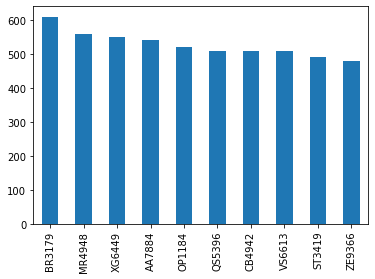

In [10]:
raw_data['article'].value_counts().head(10).plot(kind='bar')

In [11]:
top10_articles=raw_data['article'].value_counts().head(10).index

In [12]:
top10_articles_df=raw_data[raw_data['article'].isin(top10_articles)]

In [13]:
top10_articles_df=top10_articles_df.groupby(['article','label']).size().reset_index().rename(columns={0:'count'})

<AxesSubplot:xlabel='article', ylabel='count'>

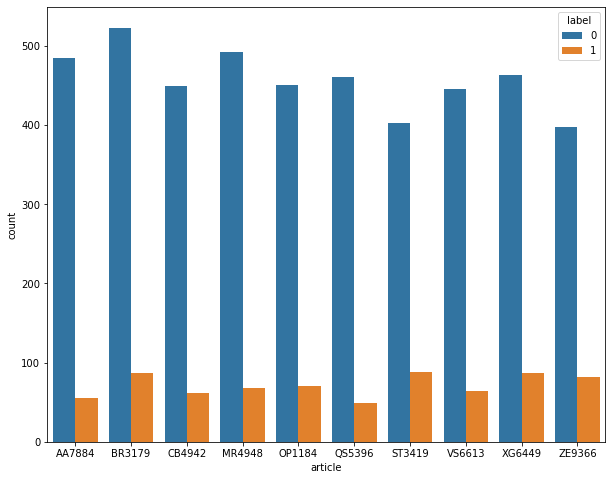

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x='article',y='count',data=top10_articles_df,hue='label')

In [15]:
raw_data['customer_id']=raw_data['customer_id'].astype(str)

In [16]:
raw_data['country'].unique()

array(['Germany', 'Austria', 'France'], dtype=object)

<AxesSubplot:xlabel='country,label'>

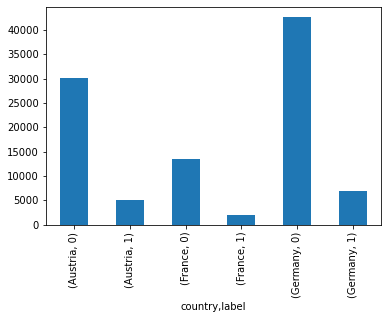

In [17]:
raw_data.groupby(['country','label'])['label'].size().plot(kind='bar')

<AxesSubplot:ylabel='productgroup,category,label'>

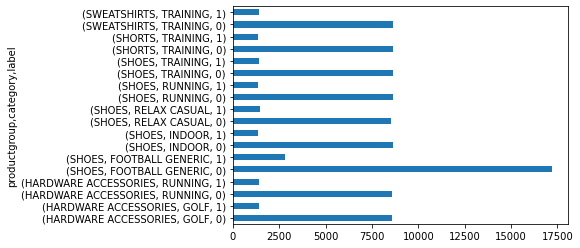

In [18]:
raw_data.groupby(['productgroup','category','label'])['label'].size().plot(kind='barh')

In [19]:
raw_data['retailweek']=pd.to_datetime(raw_data['retailweek'])

In [20]:
raw_data['year']=raw_data['retailweek'].dt.year

In [21]:
year_label=raw_data.groupby(['year','label']).size().reset_index().rename(columns={0:'count'})

<AxesSubplot:xlabel='year', ylabel='count'>

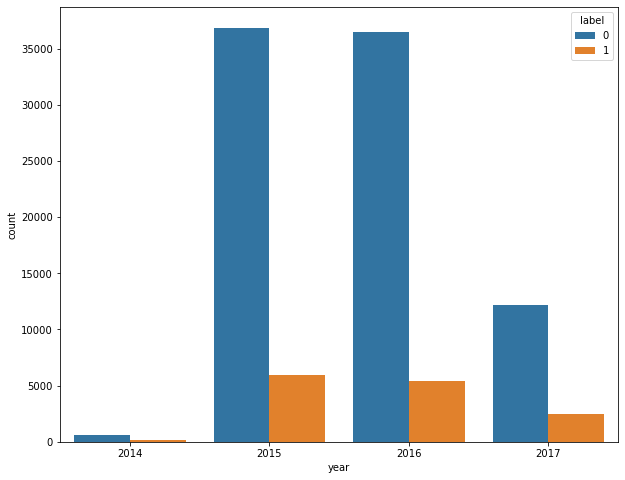

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='count',data=year_label,hue='label')

In [23]:
raw_data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016


In [24]:
raw_data['customer_id'].value_counts()

1111.0    80
1692.0    80
1264.0    80
1586.0    70
648.0     70
          ..
5406.0    10
3129.0    10
4263.0    10
5432.0    10
5744.0    10
Name: customer_id, Length: 4549, dtype: int64

In [25]:
Top20_customers=raw_data['customer_id'].value_counts().sort_values(ascending=False).head(20).reset_index()['index'].values.tolist()

In [26]:
top_20_customersdf=raw_data[raw_data['customer_id'].isin(Top20_customers)]

In [27]:
top_20_customersdf=top_20_customersdf.groupby(['customer_id','label']).size().reset_index()

<AxesSubplot:xlabel='customer_id', ylabel='0'>

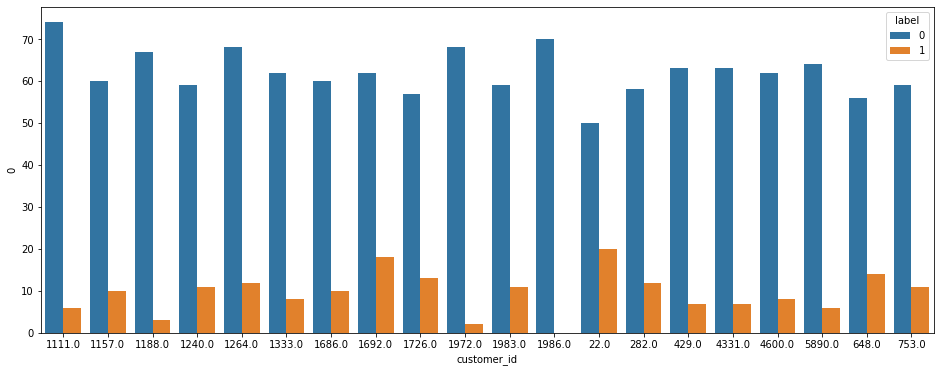

In [28]:
plt.figure(figsize=(16,6))
sns.barplot(x='customer_id',y=0,data=top_20_customersdf,hue='label')

# checking correlation for feature selection

<AxesSubplot:>

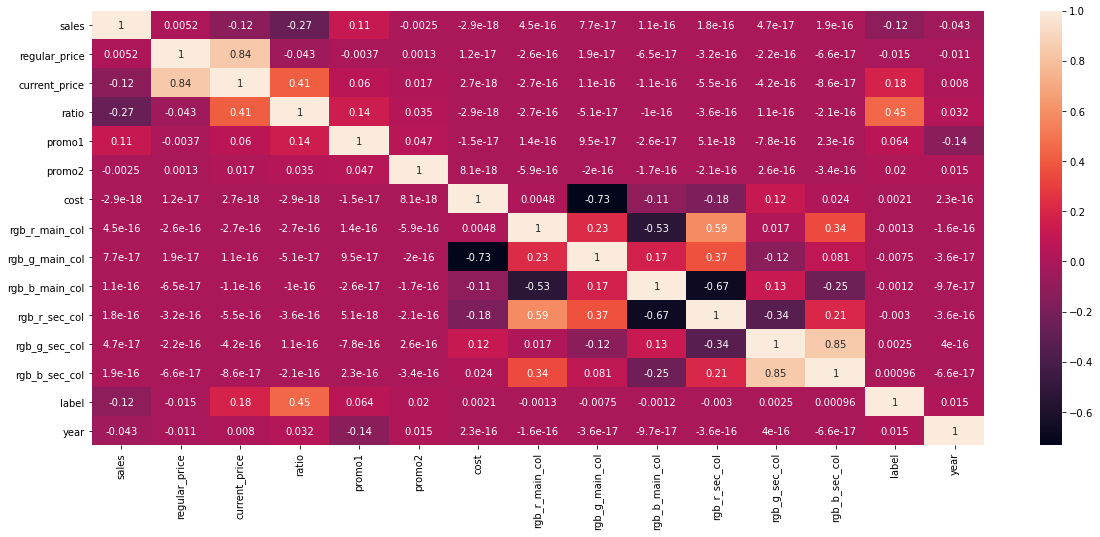

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(raw_data.corr(),annot=True)

# feature selection

In [30]:
df=raw_data.drop(['rgb_r_main_col','rgb_g_main_col','rgb_b_main_col','rgb_r_sec_col','rgb_g_sec_col','rgb_b_sec_col'], axis=1)

In [31]:
df.drop('regular_price',axis=1,inplace=True)

In [32]:
df.drop('article',axis=1,inplace=True)

In [33]:
df.drop('retailweek',axis=1,inplace=True)

In [34]:
df.drop('customer_id',axis=1,inplace=True)

In [35]:
df.head()

,country,sales,current_price,ratio,promo1,promo2,article.1,productgroup,category,cost,style,sizes,gender,label,year
0,Germany,28,3.95,0.663866,0,0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0,2016
1,Germany,28,3.95,0.663866,0,0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
2,Germany,28,3.95,0.663866,0,0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
3,Germany,28,3.95,0.663866,0,0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0,2016
4,Germany,28,3.95,0.663866,0,0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016


In [36]:
df['article.1'].value_counts()

CB8861    10000
PC6383    10000
GG8661    10000
LI3529    10000
VT7698    10000
FG2965    10000
TX1463    10000
OC6355    10000
AP5568    10000
AC7347    10000
Name: article.1, dtype: int64

In [37]:
final_data=df.drop('article.1',axis=1)

In [38]:
final_data.head()

,country,sales,current_price,ratio,promo1,promo2,productgroup,category,cost,style,sizes,gender,label,year
0,Germany,28,3.95,0.663866,0,0,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0,2016
1,Germany,28,3.95,0.663866,0,0,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
2,Germany,28,3.95,0.663866,0,0,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016
3,Germany,28,3.95,0.663866,0,0,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0,2016
4,Germany,28,3.95,0.663866,0,0,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0,2016


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [40]:
x=final_data.drop('label',axis=1)
y=final_data['label']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=444)

# cretaing dummy variables for categorical features

In [42]:
country_dummy=pd.get_dummies(final_data['country'],drop_first=True)

In [43]:
country_dummy

,France,Germany
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
99995,0,1
99996,0,1
99997,0,1
99998,0,1


In [44]:
final_data=pd.concat([x_train,country_dummy],axis=1)

In [45]:
final_data.drop('country',axis=1,inplace=True)

In [46]:
product_dummy=pd.get_dummies(final_data['productgroup'],drop_first=True)

In [47]:
final_data=pd.concat([final_data,product_dummy],axis=1)

In [48]:
final_data.drop('productgroup',axis=1,inplace=True)

In [49]:
category_dummy=pd.get_dummies(final_data['category'],drop_first=True)

In [50]:
final_data=pd.concat([final_data,category_dummy],axis=1)

In [51]:
final_data.drop('category',axis=1,inplace=True)

In [52]:
style_dummy=pd.get_dummies(final_data['style'],drop_first=True)

In [53]:
final_data=pd.concat([final_data,style_dummy],axis=1)

In [54]:
final_data.drop('style',axis=1,inplace=True)

In [55]:
size_dummy=pd.get_dummies(final_data['sizes'],drop_first=True)

In [56]:
final_data=pd.concat([final_data,size_dummy],axis=1)

In [57]:
final_data.drop('sizes',axis=1,inplace=True)

In [58]:
gender_dummy=pd.get_dummies(final_data['gender'],drop_first=True)

In [59]:
final_data=pd.concat([final_data,gender_dummy],axis=1)

In [60]:
final_data.drop('gender',axis=1,inplace=True)

In [61]:
year_dummy=pd.get_dummies(final_data['year'],drop_first=True)

In [62]:
final_data=pd.concat([final_data,year_dummy],axis=1)

In [63]:
final_data.drop('year',axis=1,inplace=True)

In [64]:
final_data.columns

Index([              'sales',       'current_price',               'ratio',
                    'promo1',              'promo2',                'cost',
                    'France',             'Germany',               'SHOES',
                    'SHORTS',         'SWEATSHIRTS',                'GOLF',
                    'INDOOR',        'RELAX CASUAL',             'RUNNING',
                  'TRAINING',                'slim',                'wide',
       'xxs,xs,s,m,l,xl,xxl',                 'men',              'unisex',
                     'women',                2015.0,                2016.0,
                      2017.0],
      dtype='object')

In [69]:
final_data.shape

(100000, 25)

# splitting my data

In [66]:
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=444)

In [68]:
x_train.shape

(80000, 13)

# oversampling my minority label 

In [73]:
final_data['label'].value_counts()

0    86072
1    13928
Name: label, dtype: int64

In [68]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [69]:
oversample = ADASYN()

In [70]:
x_transform, y_transform = oversample.fit_resample(x_train, y_train)

In [74]:
print(Counter(y_transform))

Counter({0: 68858, 1: 68193})


In [75]:
y_transform.shape

(137051,)

# model 1

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
from imblearn.pipeline import make_pipeline

In [327]:
steps=[('scaler',StandardScaler()),('tree',RandomForestClassifier(n_estimators=10))]

In [328]:
pipeline=Pipeline(steps)

In [98]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [330]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [332]:
scores = cross_val_score(pipeline, x_transform, y_transform, scoring='f1',error_score='raise', cv=cv, n_jobs=-1)

In [333]:
scores

array([0.89534355, 0.8997139 , 0.89537859, 0.89920963, 0.901089  ,
       0.89860507, 0.8994956 , 0.89973635, 0.89932584, 0.89716953,
       0.89645838, 0.89954887, 0.8985117 , 0.90242806, 0.89489942,
       0.89916535, 0.90036014, 0.89662972, 0.89483255, 0.89770418,
       0.89909084, 0.89931471, 0.90130493, 0.90278926, 0.89944218,
       0.90222754, 0.89872942, 0.89897401, 0.8985115 , 0.89659313])

In [334]:
from numpy import mean
score = mean(scores)

In [335]:
score

0.8987527653412232

In [336]:
print('F1 Score: %.3f' % score)

F1 Score: 0.899


# After studying well the last model it turned out that this is a misleading model and canot be used as using crossvalidation after oversampling will result in a wrong results as there will be data leakage (same points on training and validation data) but i decided to leave it for clarification

# model 2: logistic regression with oversampling

In [137]:
steps2=[('scaler',StandardScaler()),('log',LogisticRegression())]

In [138]:
pipeline2=Pipeline(steps2)

In [139]:
pipeline2.fit(x_transform,y_transform)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [140]:
y_pred=pipeline2.predict(x_test)

In [141]:
pipeline2.score(x_test,y_test)

0.76275

In [142]:
from sklearn.metrics import confusion_matrix,classification_report

In [143]:
confusion_matrix(y_test,y_pred)

array([[13003,  4211],
       [  534,  2252]], dtype=int64)

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     17214
           1       0.35      0.81      0.49      2786

    accuracy                           0.76     20000
   macro avg       0.65      0.78      0.67     20000
weighted avg       0.88      0.76      0.80     20000



# The previous model was a simple Logistic Regression which we used after oversampling

# model 3: k nearest neighbors
# I will try now to make a better performance by using oversampling inside cv so there will be no oversampling in validation data

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [100]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [150]:
pipeline3 = make_pipeline(RandomOverSampler(sampling_strategy='minority',random_state=44),StandardScaler(), 
                             KNeighborsClassifier(n_neighbors=35))

In [151]:
scores = cross_val_score(pipeline3, x_train, y_train, scoring='f1_macro',error_score='raise', cv=cv, n_jobs=-1)

In [152]:
scores

array([0.62346858, 0.62069554, 0.62660443, 0.63336631, 0.62640034,
       0.63257702, 0.62627227, 0.62808863, 0.62494724, 0.62255605,
       0.63206394, 0.62743774, 0.61943171, 0.62319031, 0.62872563,
       0.632262  , 0.63338801, 0.62067844, 0.62297853, 0.62395835,
       0.62667635, 0.62498871, 0.62608414, 0.62625107, 0.62704557,
       0.63552642, 0.62649384, 0.62891713, 0.6269168 , 0.62769319])

In [153]:
from numpy import mean
score = mean(scores)

In [154]:
score

0.6268561436476017

# Conclusion: model 2 Logistic Regression is the best model